In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress

In [2]:
df = pd.read_csv("used_car_sales.csv")
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD


In [3]:
#Show unique Makes value count
print(df.groupby(['Make'])['Make'].count().sort_values(ascending=False).head(25))

Make
Ford             22027
Chevrolet        21171
Toyota            6676
Mercedes-Benz     6241
Dodge             5899
BMW               5128
Jeep              4543
Cadillac          3657
Volkswagen        3589
Honda             3451
Pontiac           2712
GMC               2535
Nissan            2507
Porsche           2229
Lincoln           1860
Buick             1817
Audi              1520
Chrysler          1488
Jaguar            1323
Subaru            1311
Lexus             1296
Land Rover        1255
Plymouth          1116
Volvo             1093
Oldsmobile        1023
Name: Make, dtype: int64


In [4]:
#Create dataframe for Audi, Chrysler, Dodge, GMC, Honda, Jeep, Lexus, Mercedes-Benz, Subaru
make_df = df.loc[(df["Make"] == "Audi") | (df["Make"]=="Chrysler") | (df["Make"]=="Dodge") | (df["Make"]=="GMC") |\
                 (df["Make"] == "Honda") | (df["Make"]=="Jeep") | (df["Make"]=="Lexus") |\
                 (df["Make"] == "Mercedes-Benz") | (df["Make"]=="Subaru"),:].copy()
make_df

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
8,29023,1330,2019,07043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD
10,158271,20000,2020,333**,51674,Jeep,Wrangler,2015,SPORT,3.6L Flexible V6,SUV,6,4WD
11,72418,14100,2019,07014,109500,Jeep,Wrangler,2012,Unlimited,3.6L,SUV,6,4WD
15,84062,3820,2019,V1W 5L6,377000,Jeep,Wrangler,1997,NaN,4.0,NaN,6,AWD
24,45651,5390,2019,07840,134000,Chrysler,300 Series,2009,NaN,5.7L HEMI,NaN,8,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122113,10372,37550,2019,78006,5100,Dodge,Challenger,2017,SRT Hellcat,6.2L V8 Supercharged,2dr Car,8,2dr Cpe SRT Hellcat
122114,69243,2500,2019,19355,141000,Chrysler,300 Series,2005,C,NaN,NaN,8,RWD
122117,70731,2580,2019,20905,149000,Honda,Civic,2002,Si,2.0L I4,Hatchback,4,NaN
122133,10511,3500,2019,94952,61413,Dodge,Other Pickups,1966,Custom Sport Special,440,Pickup,8,RWD


In [5]:
#Show unique Model value count
print(make_df.groupby(['Make','Model'])['Model'].count().sort_values(ascending=False).head(55))

Make           Model         
Jeep           Wrangler          1721
Mercedes-Benz  SL-Class          1180
Honda          Civic             1062
               Accord             914
Dodge          Charger            859
Mercedes-Benz  E-Class            802
Jeep           Grand Cherokee     757
Dodge          Ram 1500           677
Mercedes-Benz  S-Class            636
GMC            Sierra 1500        591
Jeep           Cherokee           584
Mercedes-Benz  300-Series         584
Dodge          Ram 2500           555
Jeep           CJ                 513
Dodge          Challenger         513
Mercedes-Benz  C-Class            422
GMC            Yukon              420
Audi           A4                 372
Dodge          Grand Caravan      363
Honda          Odyssey            338
Dodge          Other Pickups      314
Subaru         Forester           300
Honda          CR-V               288
Mercedes-Benz  200-Series         278
Subaru         Outback            274
Chrysler       Town 

In [6]:
#Create dataframe for Audi(A4), Chrysler(300 Series), Dodge(Charger), GMC(Sierra 1500, Yukon), 
#                    Honda(Civic, Accord, Odyssey), Jeep(Wrangler, Grand Cherokee), Lexus(RX) 
#                   Mercedes-Benz (SL-Class, E-Class), Subaru(Forester, Outback, Legacy, Impreza, WRX)
model_df = df.loc[((df["Make"]=="Audi") & (df["Model"]=="A4")) | ((df["Make"]=="Chrysler") & (df["Model"]=="300 Series")) |\
            ((df["Make"]=="Dodge") & (df["Model"]=="Charger")) | ((df["Make"]=="GMC") & (df["Model"]=="Sierra 1500")) |\
            ((df["Make"]=="GMC") & (df["Model"]=="Yukon")) | ((df["Make"]=="Honda") & (df["Model"]=="Civic")) |\
            ((df["Make"]=="Honda") & (df["Model"]=="Accord")) | ((df["Make"]=="Honda") & (df["Model"]=="Odyssey")) |\
            ((df["Make"]=="Jeep") & (df["Model"]=="Wrangler")) | ((df["Make"]=="Jeep") & (df["Model"]=="Grand Cherokee")) |\
            ((df["Make"]=="Lexus") & (df["Model"]=="RX")) | ((df["Make"]=="Mercedes-Benz") & (df["Model"]=="SL-Class")) |\
            ((df["Make"]=="Mercedes-Benz") & (df["Model"]=="E-Class")) | ((df["Make"]=="Subaru") & (df["Model"]=="Forester"))|\
            ((df["Make"]=="Subaru") & (df["Model"]=="Outback")) | ((df["Make"]=="Subaru") & (df["Model"]=="Legacy")) |\
            ((df["Make"]=="Subaru") & (df["Model"]=="Impreza")) | ((df["Make"]=="Subaru") & (df["Model"]=="WRX")), :].copy()
                  
model_df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
8,29023,1330,2019,07043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD
10,158271,20000,2020,333**,51674,Jeep,Wrangler,2015,SPORT,3.6L Flexible V6,SUV,6,4WD
11,72418,14100,2019,07014,109500,Jeep,Wrangler,2012,Unlimited,3.6L,SUV,6,4WD
15,84062,3820,2019,V1W 5L6,377000,Jeep,Wrangler,1997,NaN,4.0,NaN,6,AWD
24,45651,5390,2019,07840,134000,Chrysler,300 Series,2009,NaN,5.7L HEMI,NaN,8,AWD


In [7]:
# Establish the bins and categorize the year make data.
year_bins = [0, 1970, 2001, 2010, 2015, 2016, 2017, 2018, 2019, 2020]
labels = ["<1970", "1970-2001", "2001-2010", "2010-2015","2016", "2017", "2018", "2019", "2020"]

model_df["year made"] = pd.cut(model_df["Year"], bins=year_bins, labels=labels, include_lowest=True)
model_df

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,year made
8,29023,1330,2019,07043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD,1970-2001
10,158271,20000,2020,333**,51674,Jeep,Wrangler,2015,SPORT,3.6L Flexible V6,SUV,6,4WD,2010-2015
11,72418,14100,2019,07014,109500,Jeep,Wrangler,2012,Unlimited,3.6L,SUV,6,4WD,2010-2015
15,84062,3820,2019,V1W 5L6,377000,Jeep,Wrangler,1997,NaN,4.0,NaN,6,AWD,1970-2001
24,45651,5390,2019,07840,134000,Chrysler,300 Series,2009,NaN,5.7L HEMI,NaN,8,AWD,2001-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122090,143469,7000,2020,986**,155000,GMC,Yukon,2003,K2500,6.0L Gas V8,SUV,8,4WD,2001-2010
122093,51464,1230,2019,23606,217000,Honda,Accord,2004,EX-L,3.0 V6,Coupe,6,FWD,2001-2010
122103,132249,4150,2020,945**,116000,Mercedes-Benz,E-Class,1997,E320 Sport,3.2L DOHC 24-Valve V6 Engine,4dr Car,6,RWD,1970-2001
122114,69243,2500,2019,19355,141000,Chrysler,300 Series,2005,C,NaN,NaN,8,RWD,2001-2010


In [8]:
#Changing Year datatype to string
model_df['Year'] = model_df["Year"].map(str)

In [9]:
#Review yearsold values
print(model_df.groupby(['Make','yearsold'])['yearsold'].count().sort_values(ascending=False))

Make           yearsold
Jeep           2019        1509
Honda          2019        1400
Mercedes-Benz  2019        1245
Jeep           2020         945
Honda          2020         892
Mercedes-Benz  2020         722
Subaru         2019         678
GMC            2019         605
Dodge          2019         494
Subaru         2020         417
GMC            2020         402
Dodge          2020         353
Audi           2019         234
Chrysler       2019         166
Lexus          2019         159
Audi           2020         134
Lexus          2020         101
Chrysler       2020          95
Jeep           2018          24
Honda          2018          22
Mercedes-Benz  2018          15
Subaru         2018          13
Dodge          2018          12
Audi           2018           4
Chrysler       2018           4
GMC            2018           4
Lexus          2018           3
Name: yearsold, dtype: int64


In [10]:
#Choose the columns needed for analysis
analysis_df = model_df[['pricesold', 'yearsold', 'zipcode','Make','Model','Year','year made']].copy()
analysis_df

,pricesold,yearsold,zipcode,Make,Model,Year,year made
8,1330,2019,07043,Honda,Civic,2001,1970-2001
10,20000,2020,333**,Jeep,Wrangler,2015,2010-2015
11,14100,2019,07014,Jeep,Wrangler,2012,2010-2015
15,3820,2019,V1W 5L6,Jeep,Wrangler,1997,1970-2001
24,5390,2019,07840,Chrysler,300 Series,2009,2001-2010
...,...,...,...,...,...,...,...
122090,7000,2020,986**,GMC,Yukon,2003,2001-2010
122093,1230,2019,23606,Honda,Accord,2004,2001-2010
122103,4150,2020,945**,Mercedes-Benz,E-Class,1997,1970-2001
122114,2500,2019,19355,Chrysler,300 Series,2005,2001-2010


In [11]:
#Retirieve car's sold in 2019
analysis19_df = analysis_df.loc[analysis_df["yearsold"] == 2019,:].copy()

In [12]:
#Separate data by Model
a4 = analysis19_df[(analysis19_df["Model"] == "A4")]
series300chr = analysis19_df[(analysis19_df["Model"] == "300 Series")]
charger = analysis19_df[(analysis19_df["Model"] == "Charger")]
sierra1500 = analysis19_df[(analysis19_df["Model"] == "Sierra 1500")]
yukon = analysis19_df[(analysis19_df["Model"] == "Yukon")]
civic = analysis19_df[(analysis19_df["Model"] == "Civic")]
accord = analysis19_df[(analysis19_df["Model"] == "Accord")]
odyssey = analysis19_df[(analysis19_df["Model"] == "Odyssey")]
wrangler = analysis19_df[(analysis19_df["Model"] == "Wrangler")]
grandcherokee = analysis19_df[(analysis19_df["Model"] == "Grand Cherokee")]
rx = analysis19_df[(analysis19_df["Model"] == "RX")]
slclass = analysis19_df[(analysis19_df["Model"] == "SL-Class")]
eclass = analysis19_df[(analysis19_df["Model"] == "E-Class")]
forester = analysis19_df[(analysis19_df["Model"] == "Forester")]
outback = analysis19_df[(analysis19_df["Model"] == "Outback")]
legacy = analysis19_df[(analysis19_df["Model"] == "Legacy")]
impreza = analysis19_df[(analysis19_df["Model"] == "Impreza")]
wrx = analysis19_df[(analysis19_df["Model"] == "WRX")]

In [13]:
# Group by "year made" and take the mean of each.
a4_19 = a4.groupby(["year made"]).mean()["pricesold"] 
series300chr_19 = series300chr.groupby(["year made"]).mean()["pricesold"]
charger_19 = charger.groupby(["year made"]).mean()["pricesold"]
sierra1500_19 = sierra1500.groupby(["year made"]).mean()["pricesold"]
yukon_19 = yukon.groupby(["year made"]).mean()["pricesold"]
civic_19 = civic.groupby(["year made"]).mean()["pricesold"]
accord_19 = accord.groupby(["year made"]).mean()["pricesold"]
odyssey_19 = odyssey.groupby(["year made"]).mean()["pricesold"]
wrangler_19 = wrangler.groupby(["year made"]).mean()["pricesold"]
grandcherokee_19 = grandcherokee.groupby(["year made"]).mean()["pricesold"]
rx_19 = rx.groupby(["year made"]).mean()["pricesold"]
slclass_19 = slclass.groupby(["year made"]).mean()["pricesold"]
eclass_19 = eclass.groupby(["year made"]).mean()["pricesold"]
forester_19 = forester.groupby(["year made"]).mean()["pricesold"]
outback_19 = outback.groupby(["year made"]).mean()["pricesold"]
legacy_19 = legacy.groupby(["year made"]).mean()["pricesold"]
impreza_19 = impreza.groupby(["year made"]).mean()["pricesold"]
wrx_19 = wrx.groupby(["year made"]).mean()["pricesold"]

In [14]:
#Combine the above calculations in a DataFrame
price_19_df = pd.DataFrame(
    {
        "Audi(A4)" : a4_19,
        "Chrysler (300 Series)" : series300chr_19,
        "Dodge (Charger)" : charger_19,
        "GMC (Sierra 1500)" : sierra1500_19,
        "GMC (Yukon)" : yukon_19,
        "Honda (Civic)" : civic_19,
        "Honda (Accord)" : accord_19,
        "Honda (Odyssey)" : odyssey_19,
        "Jeep (Wrangler)" : wrangler_19,
        "Jeep (Grand Cherokee)" : grandcherokee_19,
        "Lexus (RX)" : rx_19,
        "Mercedes-Benz (SL-Class)" : slclass_19,
        "Mercedes-Benz (E-Class)" : eclass_19,
        "Subaru (Forester)" : forester_19,
        "Subaru (Outback)" : outback_19,
        "Subaru (Legacy)" : legacy_19,
        "Subaru (Impreza)" : impreza_19,
        "Subaru (WRX)" : wrx_19,
    }).round(decimals=2)

price_19_df

,Audi(A4),Chrysler (300 Series),Dodge (Charger),GMC (Sierra 1500),GMC (Yukon),Honda (Civic),Honda (Accord),Honda (Odyssey),Jeep (Wrangler),Jeep (Grand Cherokee),Lexus (RX),Mercedes-Benz (SL-Class),Mercedes-Benz (E-Class),Subaru (Forester),Subaru (Outback),Subaru (Legacy),Subaru (Impreza),Subaru (WRX)
year made,,,,,,,,,,,,,,,,,,
<1970,NaN,10529.09,23292.58,5895.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38179.63,NaN,NaN,NaN,NaN,NaN,NaN
1970-2001,1961.76,1420.00,9476.20,4732.34,3578.60,2292.76,1210.62,1403.12,5559.12,1912.87,2557.33,7474.69,3731.46,1356.88,1361.00,1294.81,3365.00,7210.00
2001-2010,3507.04,5055.14,4419.65,6368.57,5455.87,2462.82,2920.54,3439.62,11333.46,4035.78,6054.46,11566.75,5443.77,2888.61,2945.62,2530.66,4111.08,8677.68
2010-2015,8715.43,13265.33,12556.25,16923.70,17318.21,7558.06,8349.72,11665.24,21479.35,18951.16,16294.00,30353.00,17910.47,7139.70,7589.51,4422.50,8665.65,13654.81
2016,24070.00,18720.00,26063.23,29079.44,36137.33,9607.86,14709.50,16373.64,25595.61,22086.32,31900.91,37356.67,27974.44,13801.67,21205.00,NaN,5376.67,19487.14
2017,21968.33,19887.14,29809.29,26660.56,34285.33,15353.10,15222.19,25000.00,29472.83,22650.80,33952.00,37600.00,35000.00,20410.00,20645.00,10395.00,11320.00,22787.14
2018,NaN,20238.89,29303.33,32264.17,43216.67,19041.00,18598.46,29373.33,37778.89,33454.58,48480.00,6060.00,47370.00,17500.00,24400.00,11100.00,10155.00,30141.67
2019,37950.00,NaN,36564.29,NaN,46214.29,19900.00,20200.00,32832.50,42311.11,30910.00,NaN,NaN,33952.50,NaN,28265.00,NaN,5405.00,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


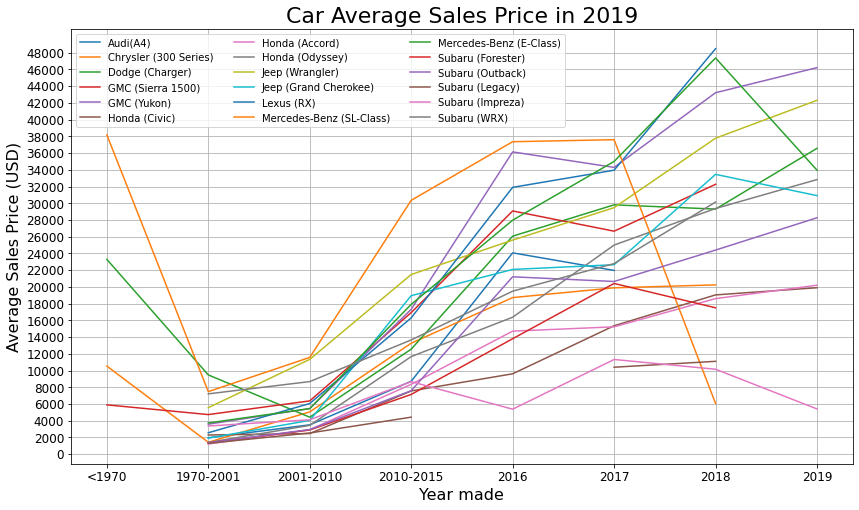

In [15]:
#Create line plot
plt.figure(figsize=(14,8))
for column_name, column in price_19_df.items():
    plt.plot(column, label=column_name)
    
plt.title("Car Average Sales Price in 2019", fontsize = 22)
plt.xlabel("Year made", fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylabel("Average Sales Price (USD)", fontsize = 16)
plt.yticks(np.arange(0, 50000, 2000), fontsize = 12)
plt.legend(ncol=3)
plt.grid()

In [16]:
subaru_df = price_19_df[['Subaru (Forester)','Subaru (Outback)','Subaru (Impreza)','Subaru (WRX)']]
subaru_df

,Subaru (Forester),Subaru (Outback),Subaru (Impreza),Subaru (WRX)
year made,,,,
<1970,NaN,NaN,NaN,NaN
1970-2001,1356.88,1361.00,3365.00,7210.00
2001-2010,2888.61,2945.62,4111.08,8677.68
2010-2015,7139.70,7589.51,8665.65,13654.81
2016,13801.67,21205.00,5376.67,19487.14
2017,20410.00,20645.00,11320.00,22787.14
2018,17500.00,24400.00,10155.00,30141.67
2019,NaN,28265.00,5405.00,NaN
2020,NaN,NaN,NaN,NaN


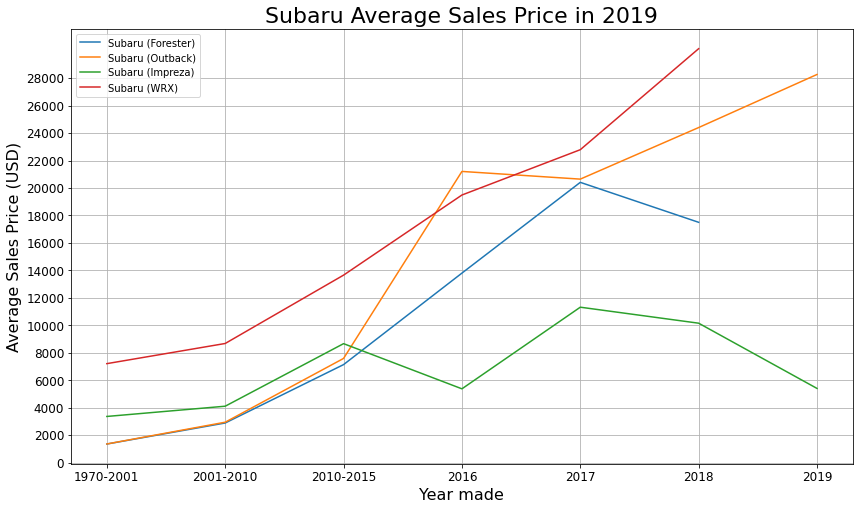

In [17]:
plt.figure(figsize=(14,8))
for column_name, column in subaru_df.items():
    plt.plot(column, label=column_name)
    
plt.title("Subaru Average Sales Price in 2019", fontsize = 22)
plt.xlabel("Year made", fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylabel("Average Sales Price (USD)", fontsize = 16)
plt.yticks(np.arange(0, 30000, 2000), fontsize = 12)
plt.legend()
plt.grid()